In [1]:
# ### Step 1: Import Libraries and Load Data
# First, we import all the Python libraries we will need.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
%matplotlib inline

# Now, load the dataset into a pandas DataFrame
df = pd.read_csv("stackoverflow_survey_2023.csv")

# Look at the first few rows to understand the data
df.head()

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0


In [2]:
# ### Step 2: Understand and Clean the Data (Data Assessment and Cleaning)
# This is the most important step! We need to see what our data looks like.

# See the columns, number of non-null values, and data types
df.info()

# Look at summary statistics for numerical columns
df.describe()

# You will need to add more code here to:
# 1. Select only the columns you are interested in.
# 2. Handle missing values (e.g., by dropping them or filling them).
# 3. Correct any data types if necessary.

# EXAMPLE (You will need to choose your own columns):
columns_to_keep = ['ConvertedCompYearly', 'Country', 'EdLevel', 'YearsCodePro']
df_subset = df[columns_to_keep].copy()
df_subset.dropna(subset=['ConvertedCompYearly', 'Country', 'EdLevel', 'YearsCodePro'], inplace=True)

# Correct the data types
df_subset['YearsCodePro'] = df_subset['YearsCodePro'].replace('Less than 1 year', 0)
df_subset['YearsCodePro'] = df_subset['YearsCodePro'].replace('More than 50 years', 51)
df_subset['YearsCodePro'] = pd.to_numeric(df_subset['YearsCodePro'])

df_subset.info()
df_subset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

,ConvertedCompYearly,Country,EdLevel,YearsCodePro
1,285000.0,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",9
2,250000.0,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",23
3,156000.0,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",7
4,23456.0,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4
5,96828.0,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21


In [3]:
# ### Step 3: Prepare the Data for Machine Learning (Modeling)
# Our model can only understand numbers, so we need to convert text columns (like Country and EdLevel) into numbers.

# Define our target variable (what we want to predict)
y = df_subset['ConvertedCompYearly']

# Define our features (the information we use to make the prediction)
X = df_subset.drop('ConvertedCompYearly', axis=1)

# Convert categorical columns into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33477, 178) (14348, 178) (33477,) (14348,)


In [4]:
# ### Step 4: Train the Machine Learning Model
# Now we create and train our prediction model.

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model on the training data
print("Training the model...")
model.fit(X_train, y_train)
print("Model training complete!")

Training the model...
Model training complete!


In [5]:
# ### Step 5: Evaluate the Model
# Let's see how well our model performs on data it has never seen before.

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R-squared and Mean Absolute Error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Error: ${mae:,.2f}")

R-squared: -0.00
Mean Absolute Error: $46,474.58


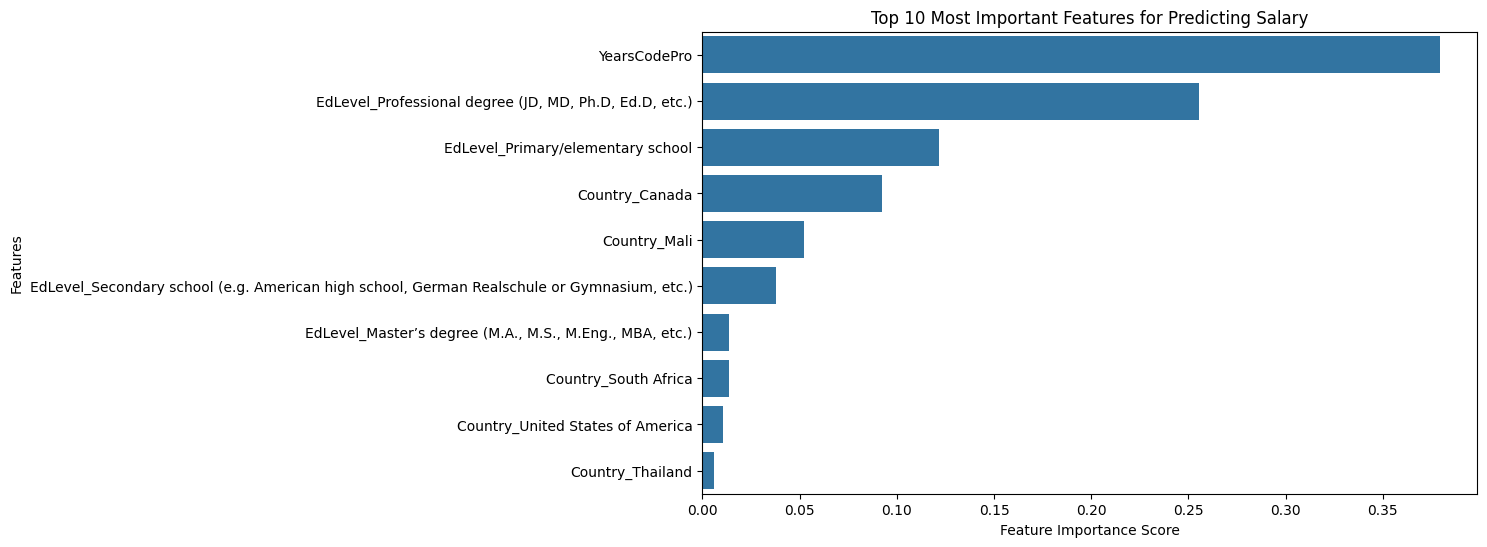

In [6]:
# ### Step 6: Visualize the Results (This is where you make the chart for your blog!)
# Now we create the feature importance plot.

# Get feature importances from the trained model
importances = model.feature_importances_

# Create a pandas Series for easy plotting, showing the top 10 features
feature_importances = pd.Series(importances, index=X_train.columns).nlargest(10)

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)

# Add titles and labels for clarity
plt.title('Top 10 Most Important Features for Predicting Salary')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()